## Observations and Insights 

The following plots and data analysis tables yield several observable trends in the data.

1. According to the summary statistics table for the tumor volume, all drug regimens have nearly symmetric distributions of data, as indicated by the closeness of the mean and median tumor volume values for each regimen.  

2. Also on the summary statistic table, the Standard Error of the Means for each drug regimen is very small relative to the means calculated with the sample data.  This suggests that the sample means should be very close, proportionally, to the population means.

2. While a cursory look at the bar charts shows that Capomulin and Ramicane have a significant advantage in total number of timepoints of observation compared to the other drug regimens, it is unclear if this is due to a greater number of observations per mouse on those 2 regimens or if there is simply a difference in the number of mice per regimen.  If populations of mice are equal, the chart would indicate a greater likelihood of survival to the final observation point for Capomulin and Ramicane.  

3. The pie charts show a near-even distribution of mice across each of the sexes, suggesting that sex should not be a source of bias in this data.

4. According to the boxplots of the final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin, of the 4 regimens, only Infubinol had even one outlier value.  This indicates that all 4 regimens have relatively normal distributions and thus the data should be representative of the total population of outcomes for each regimen.

5. According to the linear regression of the average tumor volume and weight of mice on the Capomulin regimen, the correlation coefficient of .84 indicates a strong correlation between mouse weight and tumor volume.  This indicates that meaningful observations of change in tumor volume should be normalized for mouse weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how ='outer', on='Mouse ID')
# Display the data table for preview
pd.set_option('display.max_rows', 100)
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
# Call unique values from Mouse ID column then take the length
unique_mice = combined_df['Mouse ID'].unique()
mice_num = len(unique_mice)
mice_num

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Use pd.df.duplicated to return boolean values, False if the id/timepoint combo isn't duplicated anywhere, True if it is
duplicate_time_mice = combined_df[['Mouse ID', 'Timepoint']].duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

duplicate_time_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create dataframe with all mouse ids and the boolean list for duplicated timepoints
mice_check = pd.DataFrame({'Mouse ID': combined_df['Mouse ID'], 'Duplicated Time Point': duplicate_time_mice})

# pull out all mouse ids with duplicated timepoint values
bad_mice = mice_check.loc[mice_check['Duplicated Time Point'] == True]

# generate list of all unique ids with duplicated timepoints and print to see how many
bad_mice_id = bad_mice['Mouse ID'].unique()
print(bad_mice_id)

# pull all data from original dataframe with offending mouse id 
bad_data = combined_df.loc[combined_df['Mouse ID'] == bad_mice_id[0]]
bad_data

['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_df = combined_df.loc[combined_df['Mouse ID'] != bad_mice_id[0]]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(filtered_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# call drug regimen and tumor volume columns from filtered data, that's all that's needed here
regimen_tumorvol = filtered_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# use groupby objects with analysis functions to get analysis values for each regimen
rtv_mean = regimen_tumorvol.groupby(['Drug Regimen']).mean()
rtv_median = regimen_tumorvol.groupby(['Drug Regimen']).median()
rtv_std = regimen_tumorvol.groupby(['Drug Regimen']).std()
rtv_sem = regimen_tumorvol.groupby(['Drug Regimen']).sem()

#merge the dataframes, rename columns in the middle to prevent duplicate column names 
rtv_mm =pd.merge(rtv_mean, rtv_median, on='Drug Regimen')
rtv_mmstd = pd.merge(rtv_mm, rtv_std, on='Drug Regimen')

rtv_mmstd = rtv_mmstd.rename(columns={'Tumor Volume (mm3)_x': 'Mean Tumor Volume (mm3)',
                                      'Tumor Volume (mm3)_y': 'Median Tumor Volume (mm3)',
                                     'Tumor Volume (mm3)': 'Tumor Volume (mm3), STD'})

summary_stats = pd.merge(rtv_mmstd, rtv_sem, on='Drug Regimen')

# rename last column to fit
summary_stats = summary_stats.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3), SEM'})

summary_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),"Tumor Volume (mm3), STD","Tumor Volume (mm3), SEM"
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_alter = regimen_tumorvol.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'sem']})

summary_stats_alter

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


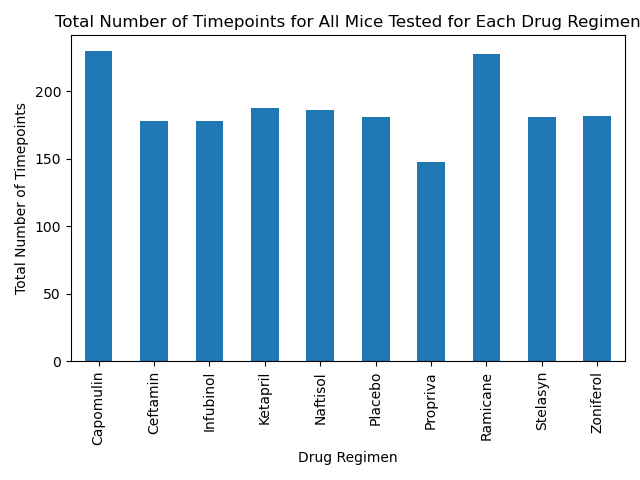

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# call drug regimen and timepoint columns for analysis
df_dr_tp = filtered_df[['Drug Regimen', 'Timepoint']]

# Group timepoints by drug regimen and count how many there are for each
timepoint_count = df_dr_tp.groupby(['Drug Regimen']).count()

# rename column to make dataframe more representative and reset index column to make next step easier
timepoint_count = timepoint_count.rename(columns={'Timepoint': 'Total Timepoint Count'})
timepoint_count.reset_index(inplace=True)

# use pd.df.plot() to plot bar chart with proper title and axis labels. remove legend since it isn;t useful here
timepoint_count.plot(x='Drug Regimen', y='Total Timepoint Count', kind='bar', 
                     title='Total Number of Timepoints for All Mice Tested for Each Drug Regimen',
                    ylabel='Total Number of Timepoints', legend=False)

# tighten up chart layout so it looks nicer
plt.tight_layout()

<IPython.core.display.Javascript object>


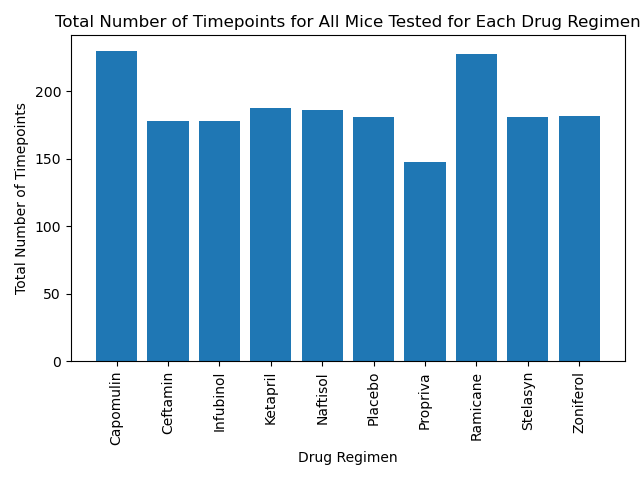

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# generate a new figure for the plot
plt.figure()

# use pyplot to generate a bar chart
plt.bar(timepoint_count['Drug Regimen'], timepoint_count['Total Timepoint Count'])

# adjust format, add title, and axis labels
plt.xticks(rotation='vertical')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')

# tighten up layout for aesthetics
plt.tight_layout()

<IPython.core.display.Javascript object>


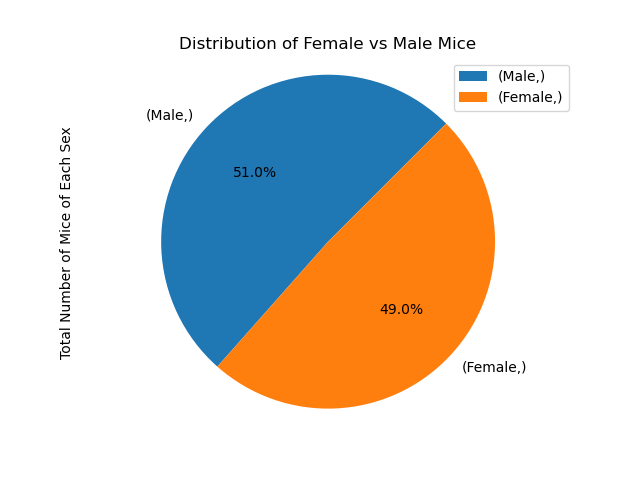

(-1.1054601616753736,
 1.1042365487930546,
 -1.1113356990969392,
 1.1025301389854145)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# call the mouse sex column to a new dataframe
mice_sex_dist = filtered_df[['Sex']]

# generate dataframe with sexes and counts for each sex
sex_count_df = pd.DataFrame(mice_sex_dist.value_counts())
sex_count_df.columns = ['Total Number of Mice of Each Sex']

# plot using pandas plot function
sex_count_df.plot(kind='pie', y='Total Number of Mice of Each Sex', autopct='%1.1f%%', 
                 title='Distribution of Female vs Male Mice', startangle=45)
plt.axis('equal')

<IPython.core.display.Javascript object>


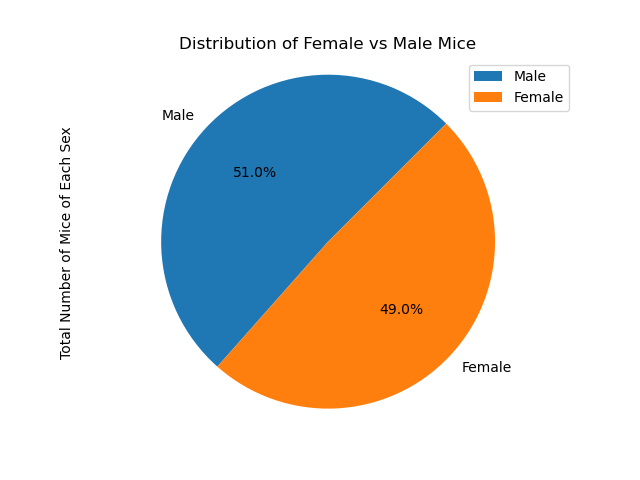

Text(0, 0.5, 'Total Number of Mice of Each Sex')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# turn index back into column for easier referencing
sex_count_df.reset_index(inplace=True)

# generate lists with the dataframe column contents
sexes = sex_count_df['Sex'].tolist()
mouse_counts = sex_count_df['Total Number of Mice of Each Sex'].tolist()

# use pyplot to generate pie chart with title, legend, and labels to match previous pie chart
plt.figure()
plt.pie(mouse_counts, labels=sexes, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.legend()
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Total Number of Mice of Each Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mid_tp = filtered_df[['Mouse ID', 'Timepoint']]

final_timepoints = mid_tp.groupby(['Mouse ID']).max()
 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tv = pd.merge(filtered_df, final_timepoints, on=['Mouse ID', 'Timepoint'])
final_tv

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_volume_cap = []
final_volume_ram = []
final_volume_inf = []
final_volume_cef = []

indexval = np.arange(0,248, 1)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
for val in indexval:
    if final_tv['Drug Regimen'][val] == 'Capomulin':
        final_volume_cap.append(final_tv['Tumor Volume (mm3)'][val])
    if final_tv['Drug Regimen'][val] == 'Ramicane':
        final_volume_ram.append(final_tv['Tumor Volume (mm3)'][val])
    if final_tv['Drug Regimen'][val] == 'Infubinol':
        final_volume_inf.append(final_tv['Tumor Volume (mm3)'][val])
    if final_tv['Drug Regimen'][val] == 'Ceftamin':
        final_volume_cef.append(final_tv['Tumor Volume (mm3)'][val])    

# assemble list of the final volume lists for the 4 selected drug regimens
final_volume_list = [final_volume_cap, final_volume_ram, final_volume_inf, final_volume_cef]

# use list comprehensions for the numpy quartile function to find quartiles
q1_val = [np.quantile(list, .25) for list in final_volume_list]
q2_val = [np.quantile(list, .5) for list in final_volume_list]
q3_val = [np.quantile(list, .75) for list in final_volume_list]

# determine the IQR by subtracting q1 for q3 values
list_index = [0, 1, 2, 3]
iqr_val = [q3_val[index] - q1_val[index] for index in list_index]

# use q1 and IQR to determine lower bounds
lbound_val = [q1_val[index] - (iqr_val[index] * 1.5) for index in list_index]

# use q2 and IQR to determine upper bounds
ubound_val = [q3_val[index] + (iqr_val[index] * 1.5) for index in list_index]

# assemble dataframe for easier comprehension
box_plot_values_df = pd.DataFrame({'Drug Regimen': treatment_list,
                                 'Lower Bound': lbound_val,
                                   'Quartile 1': q1_val,
                                   'Median': q2_val,
                                   'Quartile 3': q3_val,
                                   'Upper Bound': ubound_val,
                                   'IQR': iqr_val})
box_plot_values_df

,Drug Regimen,Lower Bound,Quartile 1,Median,Quartile 3,Upper Bound,IQR
0,Capomulin,20.704562,32.377357,38.125164,40.159220,51.832015,7.781863
1,Ramicane,17.912664,31.560470,36.561652,40.659006,54.306811,9.098537
2,Infubinol,36.832905,54.048608,60.165180,65.525743,82.741446,11.477135
3,Ceftamin,25.355450,48.722078,59.851956,64.299830,87.666458,15.577752


In [15]:
    # Determine outliers using upper and lower bounds
# generate empty lists for outliers
cap_outliers = []
ram_outliers = []
inf_outliers = []
cef_outliers = []

# use loops to sort out outlier values for each drug regimen
for tumor in final_volume_cap:
        if tumor < lbound_val[0]:
            cap_outliers.append(tumor)
        if tumor > ubound_val[0]:
            cap_outliers.append(tumor)

for tumor in final_volume_ram:
        if tumor < lbound_val[1]:
            ram_outliers.append(tumor)
        if tumor > ubound_val[1]:
            ram_outliers.append(tumor)
        
for tumor in final_volume_inf:
        if tumor < lbound_val[2]:
            inf_outliers.append(tumor)
        if tumor > ubound_val[2]:
            inf_outliers.append(tumor)
        
for tumor in final_volume_cef:
        if tumor < lbound_val[3]:
            cef_outliers.append(tumor)
        if tumor > ubound_val[3]:
            cef_outliers.append(tumor)

# print any outlier values to terminal, with a different message if there are no outliers
if len(cap_outliers) == 0:
        print('There were no outlying values for final tumor volume for Capomulin')
else:
        print('Capomulin mice had the following outlying values for final tumor volume:')
        print(cap_outliers)
    
if len(ram_outliers) == 0:
        print('There were no outlying values for final tumor volume for Ramicane')
else:
        print('Ramicane mice had the following outlying values for final tumor volume:')
        print(ram_outliers)
    
if len(inf_outliers) == 0:
        print('There were no outlying values for final tumor volume for Infubinol')
else:
        print('Infubinol mice had the following outlying values for final tumor volume:')
        print(inf_outliers)
    
if len(cef_outliers) == 0:
        print('There were no outlying values for final tumor volume for Ceftamin')
else:
        print('Ceftamin mice had the following outlying values for final tumor volume:')
        print(cef_outliers)

There were no outlying values for final tumor volume for Capomulin
There were no outlying values for final tumor volume for Ramicane
Infubinol mice had the following outlying values for final tumor volume:
[36.3213458]
There were no outlying values for final tumor volume for Ceftamin


<IPython.core.display.Javascript object>


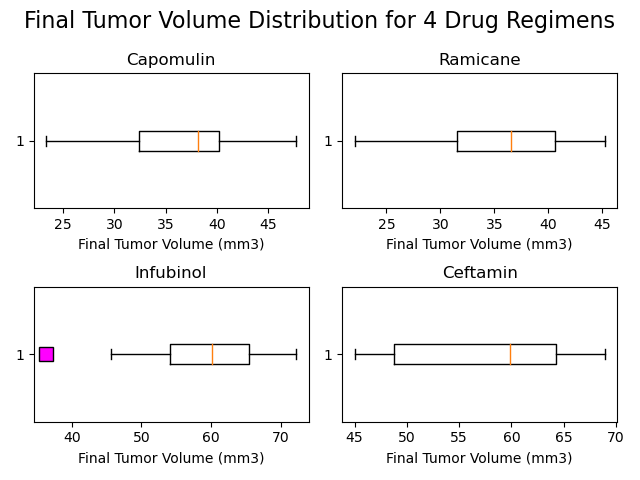

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# generate figure with 4 subplots
fig, axs = plt.subplots(2,2)

# plot capomulin data
axs[0,0].boxplot(final_volume_cap, vert=False, flierprops={'marker': 's', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
axs[0,0].set_title('Capomulin')
axs[0,0].set_xlabel('Final Tumor Volume (mm3)')

# plot ramicane data
axs[0,1].boxplot(final_volume_ram, vert=False, flierprops={'marker': 's', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
axs[0,1].set_title('Ramicane')
axs[0,1].set_xlabel('Final Tumor Volume (mm3)')

# plot infubinol data
axs[1,0].boxplot(final_volume_inf, vert=False, flierprops={'marker': 's', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
axs[1,0].set_title('Infubinol')
axs[1,0].set_xlabel('Final Tumor Volume (mm3)')

# plot ceftamin data
axs[1,1].boxplot(final_volume_cef, vert=False, flierprops={'marker': 's', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
axs[1,1].set_title('Ceftamin')
axs[1,1].set_xlabel('Final Tumor Volume (mm3)')

# add title to main figure, tighten up layout
fig.suptitle('Final Tumor Volume Distribution for 4 Drug Regimens', fontsize=16)
plt.tight_layout()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


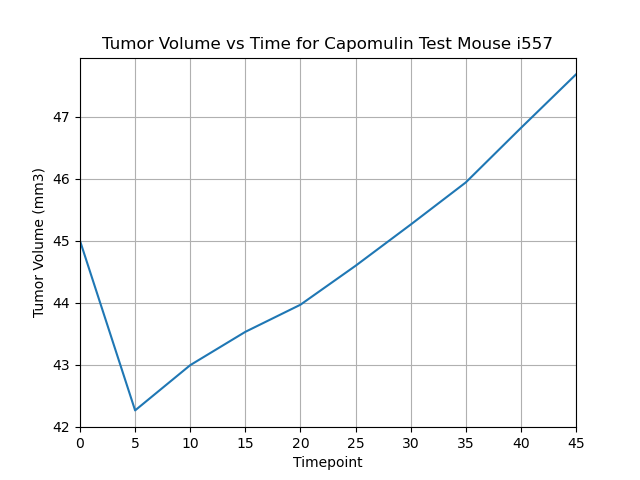

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# call mouse id, drug regimen, timepoint, and tumor volume columns for analysis
mouse_dr_tp_tv = filtered_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

# filter them for mice that were on capomulin
cap_tv_tp = mouse_dr_tp_tv.loc[mouse_dr_tp_tv['Drug Regimen'] == 'Capomulin']

# to ensure the chosen mouse ran the full timeframe, groupby mouse id and count entries for the other columns 
cap_mice_count = cap_tv_tp.groupby(['Mouse ID']).count()

# determine max number of timepoints to find the longest timeframe any mouse was on the drug regimen
max_timepoints = cap_mice_count['Timepoint'].max()

# reduce results to only those with the maximum number of timepoints
fulltime_cap_mice = cap_mice_count.loc[cap_mice_count['Timepoint']  == max_timepoints]

# reset index to make mouse id column browseable
fulltime_cap_mice.reset_index(inplace=True)

# pick a mouse from the list to plot, I chose the 5th one, at random
chosen_mouse = fulltime_cap_mice['Mouse ID'][4]

# call timepoint and tumor volume data for chosen mouse
chosen_mouse_df = cap_tv_tp.loc[cap_tv_tp['Mouse ID'] == chosen_mouse]

# establish string variable for plot title
line_title = f"Tumor Volume vs Time for Capomulin Test Mouse {chosen_mouse}"

# generate line plot for chosen mouse tumor volume v timepoints, with proper labels and formatting
chosen_mouse_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', title=line_title, xticks = chosen_mouse_df['Timepoint'], 
                         ylabel='Tumor Volume (mm3)', legend=False, xlim=[0,45])
plt.grid()

<IPython.core.display.Javascript object>


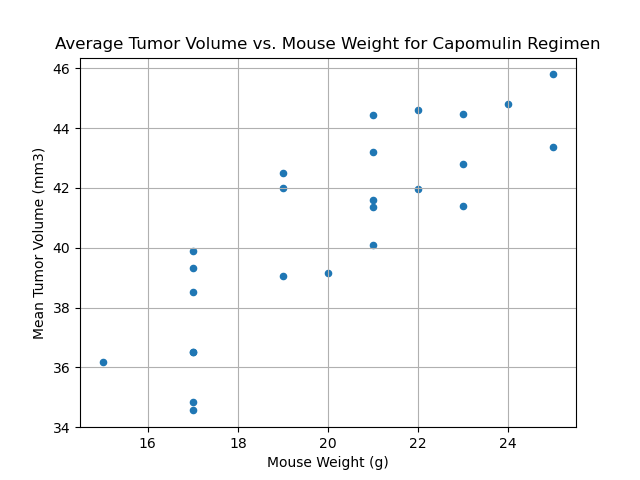

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#cap_tv_tp

# call mouse id, drug regimen, weight, and tumor volume columns from filtered_df
id_weight_tv = filtered_df[['Mouse ID', 'Drug Regimen','Weight (g)', 'Tumor Volume (mm3)']]

# filter for only mice on capomulin
cap_weight_tv = id_weight_tv.loc[id_weight_tv['Drug Regimen'] == 'Capomulin']

# use groupby object to get mean tumor volume for each mouse
mean_volume_df = cap_weight_tv.groupby(['Mouse ID', 'Drug Regimen', 'Weight (g)']).mean()

# reset index for easier referencing
mean_volume_df.reset_index(inplace=True)

# generate scatter plot with proper labels and format
mean_volume_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', xlabel='Mouse Weight (g)', ylabel='Mean Tumor Volume (mm3)',
                           title='Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.grid()

## Correlation and Regression

<IPython.core.display.Javascript object>


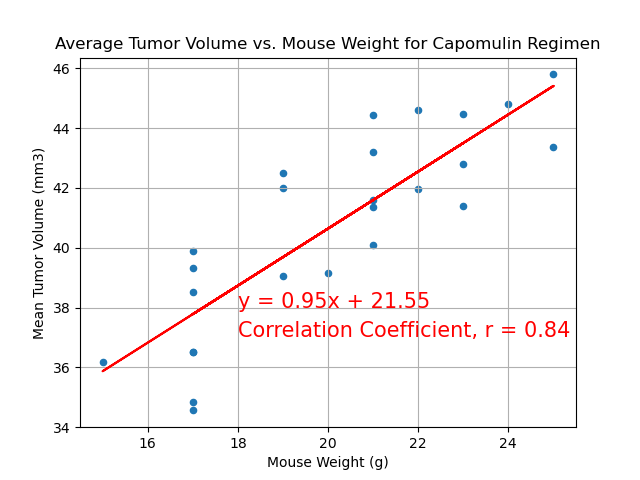

Text(18, 37, 'Correlation Coefficient, r = 0.84')

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# pull weight and tumor volume into individual lists to make regressions simpler
x_val = mean_volume_df['Weight (g)'].tolist()
y_val = mean_volume_df['Tumor Volume (mm3)'].tolist()

# calculate regression parameters with stats.linregress()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

# generate the regression line equation string and the r-value string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = f"Correlation Coefficient, r = {str(round(rvalue, 2))}"

# generate the regression values with the slope-intercept equation
regress_values = [values * slope + intercept for values in x_val]

# for clarity's sake, repeat the previous plot
mean_volume_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', xlabel='Mouse Weight (g)', ylabel='Mean Tumor Volume (mm3)',
                           title='Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.grid()

# plot the regression values
plt.plot(x_val, regress_values, "r-")

# annotate the plot with regression line equation, and correlation coefficient
plt.annotate(line_eq,(18, 38),fontsize=15,color="red")
plt.annotate(correlation,(18, 37),fontsize=15,color="red")